# Introduction
## Goal 
Visualized trained models results (individually and Ensemble) and update the hyper params tunning from the results

# 1 Data Preparation and Loading

In [1]:
# Go to project root folder
import os
os.chdir("../")
%pwd

'/workspaces/car_vs_ambulance_classification_ensemble_cnn'

In [2]:
# automatically reload all modules before executing
%load_ext autoreload
%autoreload 2 

In [3]:
import tensorflow as tf
import utils
from src.utils.image_data_loader import ImageDataLoader
import json

2024-10-20 11:54:09.771123: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-20 11:54:09.855965: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-20 11:54:09.878152: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-20 11:54:10.034310: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
utils.utils.gpu_clean_up()

I0000 00:00:1729425252.771872    1176 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729425252.833573    1176 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729425252.837110    1176 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355


In [5]:
PARAMS_YAML = 'params.yaml'
params_config = utils.utils.read_yaml(yaml_path=PARAMS_YAML)

2024-10-20 11:54:12,873 — utils.utils — INFO — yaml file: <_io.TextIOWrapper name='params.yaml' mode='r' encoding='UTF-8'> loaded successfully


In [6]:
tf.random.set_seed(params_config.base.random_seed)

In [7]:
image_loader = ImageDataLoader(params_yaml=PARAMS_YAML)
train_ds, val_ds = image_loader.load_image_dataset()
class_names = image_loader.class_names
class_names

2024-10-20 11:54:12,924 — utils.utils — INFO — yaml file: <_io.TextIOWrapper name='params.yaml' mode='r' encoding='UTF-8'> loaded successfully


Found 2227 files belonging to 2 classes.


I0000 00:00:1729425252.962708    1176 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729425252.968141    1176 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729425252.970165    1176 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729425253.102573    1176 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

Found 557 files belonging to 2 classes.
2024-10-20 11:54:13,906 — src.utils.image_data_loader — INFO — load_image_dataset are prefetched
2024-10-20 11:54:13,906 — src.utils.image_data_loader — INFO — load_image_dataset completed


['Ambulance', 'Car']

 ## 2. Model Loading

### 1. Lenet

Loading trained model

In [8]:
lenet_model = tf.keras.models.load_model(
    f'{params_config.paths.trained_model_path}/lenet.keras')
lenet_model.build()

In [9]:
with open(f'{params_config.evaluate.results_dir}/lenet_metrics.json', 'r') as f:
    lenet_model_metrics = json.load(f)

print(json.dumps(lenet_model_metrics, indent=2))

{
  "classification_report": {
    "Ambulance": {
      "precision": 0.0,
      "recall": 0.0,
      "f1-score": 0.0,
      "support": 77.0
    },
    "Car": {
      "precision": 0.8610108303249098,
      "recall": 0.99375,
      "f1-score": 0.9226305609284333,
      "support": 480.0
    },
    "accuracy": 0.8563734290843806,
    "macro avg": {
      "precision": 0.4305054151624549,
      "recall": 0.496875,
      "f1-score": 0.46131528046421666,
      "support": 557.0
    },
    "weighted avg": {
      "precision": 0.7419841984846619,
      "recall": 0.8563734290843806,
      "f1-score": 0.795085582128632,
      "support": 557.0
    }
  },
  "confusion_matrix": [
    [
      0,
      77
    ],
    [
      3,
      477
    ]
  ]
}


In [10]:
lenet_predictions = lenet_model.predict(val_ds)
lenet_predictions

2024-10-20 11:54:15.937863: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8906
W0000 00:00:1729425256.105891    1359 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729425256.128765    1359 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729425256.131989    1359 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729425256.134513    1359 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729425256.140996    1359 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729425256.143090    1359 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729425256.143849    1359 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729425256.146338    1359 gpu_t

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


W0000 00:00:1729425256.939508    1358 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729425256.940167    1358 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729425256.940690    1358 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729425256.941282    1358 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729425256.941909    1358 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729425256.942537    1358 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729425256.943205    1358 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729425256.945911    1358 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729425256.954635    1358 gp

array([[9.1210431e-01],
       [8.5331386e-01],
       [9.7251374e-01],
       [9.8821425e-01],
       [9.6645266e-01],
       [8.9880383e-01],
       [9.1481775e-01],
       [8.0271971e-01],
       [9.0757722e-01],
       [8.1508297e-01],
       [9.4660884e-01],
       [9.2911619e-01],
       [8.0836177e-01],
       [9.8965210e-01],
       [8.6580551e-01],
       [9.5172924e-01],
       [9.9949181e-01],
       [9.1783208e-01],
       [9.2399836e-01],
       [8.3289719e-01],
       [9.9910045e-01],
       [8.5331386e-01],
       [9.9525851e-01],
       [9.6595222e-01],
       [9.1552943e-01],
       [7.8651094e-01],
       [9.9834359e-01],
       [8.5913908e-01],
       [8.8214731e-01],
       [9.3317068e-01],
       [9.2665160e-01],
       [9.2865169e-01],
       [9.4894451e-01],
       [9.8815417e-01],
       [9.5484877e-01],
       [9.5591468e-01],
       [9.1188562e-01],
       [9.6170992e-01],
       [9.7642994e-01],
       [8.9839071e-01],
       [8.9138001e-01],
       [8.489843

### 2. MiniVGGNet

Loading trained model

In [11]:
mini_vgg_net_model = tf.keras.models.load_model(
    f'{params_config.paths.trained_model_path}/mini_vgg_net.keras')
mini_vgg_net_model.build()

In [12]:
with open(f'{params_config.evaluate.results_dir}/mini_vgg_net_metrics.json', 'r') as f:
    mini_vgg_net_metrics = json.load(f)
print(json.dumps(mini_vgg_net_metrics, indent=2))

{
  "classification_report": {
    "Ambulance": {
      "precision": 0.3125,
      "recall": 0.2597402597402597,
      "f1-score": 0.28368794326241137,
      "support": 77.0
    },
    "Car": {
      "precision": 0.8843813387423936,
      "recall": 0.9083333333333333,
      "f1-score": 0.8961973278520041,
      "support": 480.0
    },
    "accuracy": 0.8186714542190305,
    "macro avg": {
      "precision": 0.5984406693711968,
      "recall": 0.5840367965367965,
      "f1-score": 0.5899426355572077,
      "support": 557.0
    },
    "weighted avg": {
      "precision": 0.8053241339252224,
      "recall": 0.8186714542190305,
      "f1-score": 0.8115236786358486,
      "support": 557.0
    }
  },
  "confusion_matrix": [
    [
      20,
      57
    ],
    [
      44,
      436
    ]
  ]
}


In [13]:
mini_vgg_net_predictions = mini_vgg_net_model.predict(val_ds)
mini_vgg_net_predictions

W0000 00:00:1729425263.138610    1360 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729425263.139355    1360 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729425263.139909    1360 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729425263.140440    1360 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729425263.140970    1360 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729425263.141656    1360 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729425263.142333    1360 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729425263.143220    1360 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729425263.144108    1360 gp

 1/35 ━━━━━━━━━━━━━━━━━━━━ 15s 468ms/step

W0000 00:00:1729425263.340533    1360 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729425263.345919    1360 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729425263.350162    1360 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729425263.354606    1360 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729425263.357657    1360 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729425263.380150    1360 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729425263.380925    1360 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729425263.382609    1360 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729425263.383374    1360 gp

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

W0000 00:00:1729425263.921915    1359 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729425263.923109    1359 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729425263.924247    1359 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729425263.924753    1359 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729425263.925257    1359 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729425263.925754    1359 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729425263.926261    1359 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729425263.927175    1359 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729425263.927959    1359 gp

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


W0000 00:00:1729425264.123227    1359 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729425264.125307    1359 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729425264.126360    1359 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729425264.127210    1359 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729425264.128778    1359 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729425264.129579    1359 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729425264.130396    1359 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729425264.132156    1359 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729425264.133339    1359 gp

array([[4.87046354e-02],
       [9.99604762e-01],
       [8.85700345e-01],
       [9.98376250e-01],
       [9.10154462e-01],
       [7.22675979e-01],
       [9.98664141e-01],
       [9.94176745e-01],
       [8.62655401e-01],
       [9.96244311e-01],
       [9.99949098e-01],
       [9.99233603e-01],
       [9.99117553e-01],
       [9.99956965e-01],
       [9.99928236e-01],
       [9.59813774e-01],
       [9.99975085e-01],
       [3.42803359e-01],
       [9.99634743e-01],
       [9.99998689e-01],
       [9.99970913e-01],
       [9.99604762e-01],
       [9.99986053e-01],
       [9.16797161e-01],
       [9.99962926e-01],
       [9.99326706e-01],
       [9.99298573e-01],
       [9.96204078e-01],
       [9.96664703e-01],
       [9.98082280e-01],
       [9.98396814e-01],
       [9.99245405e-01],
       [8.66759777e-01],
       [9.99965668e-01],
       [8.67250144e-01],
       [9.99397993e-01],
       [4.53602582e-01],
       [9.99962449e-01],
       [6.69352949e-01],
       [9.94533539e-01],


### 3. ShallowNet

Loading trained model

In [14]:
shallownet_model = tf.keras.models.load_model(
    f'{params_config.paths.trained_model_path}/shallownet.keras')
shallownet_model.build()

In [15]:
with open(f'{params_config.evaluate.results_dir}/shallownet_metrics.json', 'r') as f:
    shallownet_metrics = json.load(f)
print(json.dumps(shallownet_metrics, indent=2))

{
  "classification_report": {
    "Ambulance": {
      "precision": 0.6875,
      "recall": 0.14285714285714285,
      "f1-score": 0.23655913978494625,
      "support": 77.0
    },
    "Car": {
      "precision": 0.878003696857671,
      "recall": 0.9895833333333334,
      "f1-score": 0.930460333006856,
      "support": 480.0
    },
    "accuracy": 0.8725314183123878,
    "macro avg": {
      "precision": 0.7827518484288355,
      "recall": 0.5662202380952381,
      "f1-score": 0.5835097363959012,
      "support": 557.0
    },
    "weighted avg": {
      "precision": 0.8516683563584956,
      "recall": 0.8725314183123878,
      "f1-score": 0.8345350334052635,
      "support": 557.0
    }
  },
  "confusion_matrix": [
    [
      11,
      66
    ],
    [
      5,
      475
    ]
  ]
}


In [16]:
shallownet_predictions = shallownet_model.predict(val_ds)
shallownet_predictions

 1/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[1.        ],
       [0.99963546],
       [0.99999046],
       [1.        ],
       [0.98523664],
       [0.99289095],
       [0.9999081 ],
       [0.89463997],
       [0.99876356],
       [0.98229927],
       [0.9997327 ],
       [0.9998356 ],
       [0.86583734],
       [1.        ],
       [0.9990409 ],
       [0.9970637 ],
       [0.99999964],
       [0.581597  ],
       [0.99765164],
       [0.99998057],
       [0.9999999 ],
       [0.99963546],
       [0.9999629 ],
       [0.98321193],
       [1.        ],
       [0.99635977],
       [1.        ],
       [0.9996574 ],
       [0.9997942 ],
       [0.9999987 ],
       [0.9999732 ],
       [0.9999914 ],
       [0.9969939 ],
       [0.99999344],
       [0.9974868 ],
       [0.98389316],
       [0.99997926],
       [0.99999726],
       [1.        ],
       [0.99993813],
       [0.99999976],
       [0.9891049 ],
       [0.9109447 ],
       [0.9994863 ],
       [0.99995625],
       [0.9999167 ],
       [0.99924254],
       [0.999

# 3. Evaluation

In [17]:
from src.evaluate.ensemble_stratedy import EnsembleStrategy, VotingStrategy, WeightedVotingStrategy

In [18]:
all_predictions = [lenet_predictions,
                   mini_vgg_net_predictions, shallownet_predictions]

Use the Ensemble Strategy to Get Final Prediction

In [19]:
voting_strategy = VotingStrategy()
voting_preds = voting_strategy.ensemble_predict(all_predictions)
voting_preds

2024-10-20 11:54:24,562 — src.evaluate.ensemble_stratedy — INFO — Using Voting strategy for ensemble predictions.


array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [ ]:
weighted_voting_strategy = WeightedVotingStrategy(weights=[0.4, 0.5, 0.1])
weighted_voting__preds = weighted_voting_strategy.ensemble_predict(
    all_predictions)
weighted_voting__preds

2024-10-20 11:54:24,596 — src.evaluate.ensemble_stratedy — INFO — Using Weighted Voting strategy for ensemble predictions.


array([[0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
    

### Results

In [21]:
import matplotlib.pyplot as plt
import numpy as np

In [30]:
def plot(dataset, predicted_labels, title: str):
    # Get a batch of images and true labels from the validation dataset
    for images, true_labels in dataset.take(1):  # Take one batch

        # Plot a 3x3 grid of images with their predicted labels
        plt.figure(figsize=(10, 10))

        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            # Convert to uint8 for display
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(
                f"Pred: {class_names[predicted_labels[i][0]]}, Actual: {class_names[true_labels[i]]}")
            plt.axis("off")
        # Add the main title
        plt.suptitle(title, fontsize=16)
        plt.tight_layout()
        plt.show()

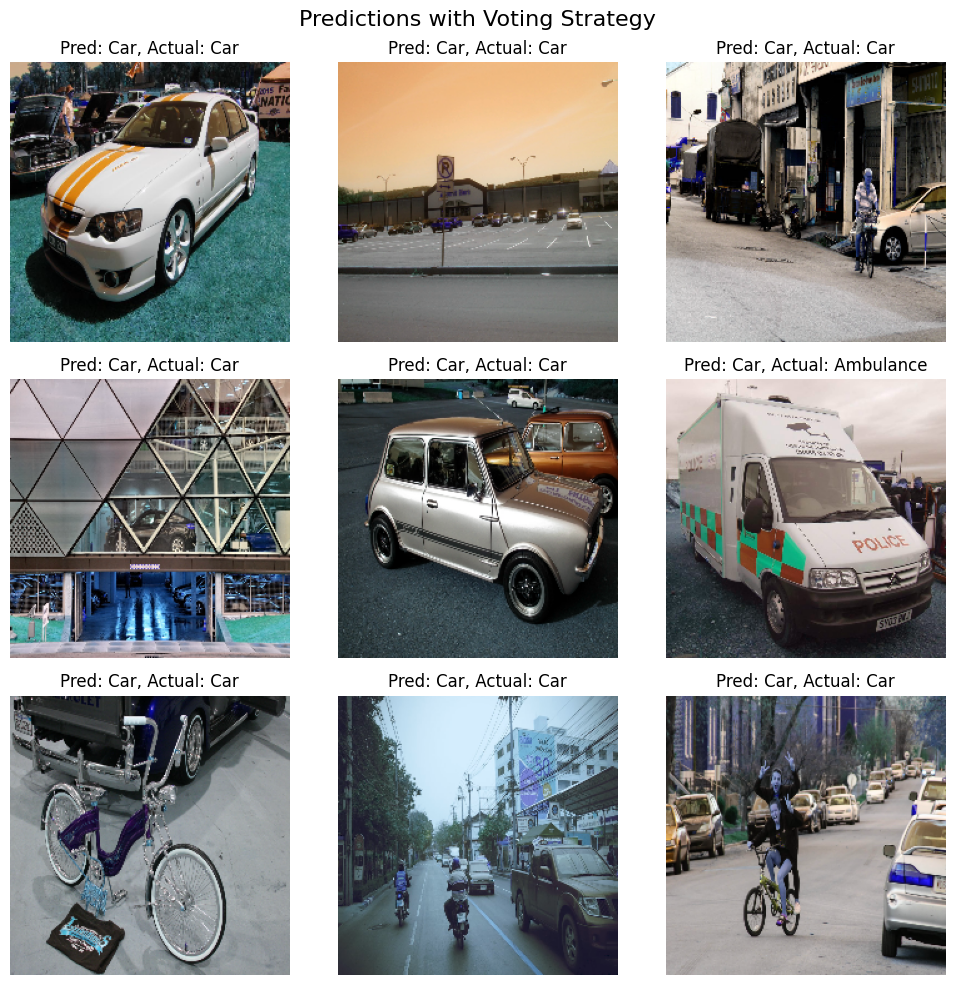

In [31]:
plot(val_ds, voting_preds, title="Predictions with Voting Strategy")

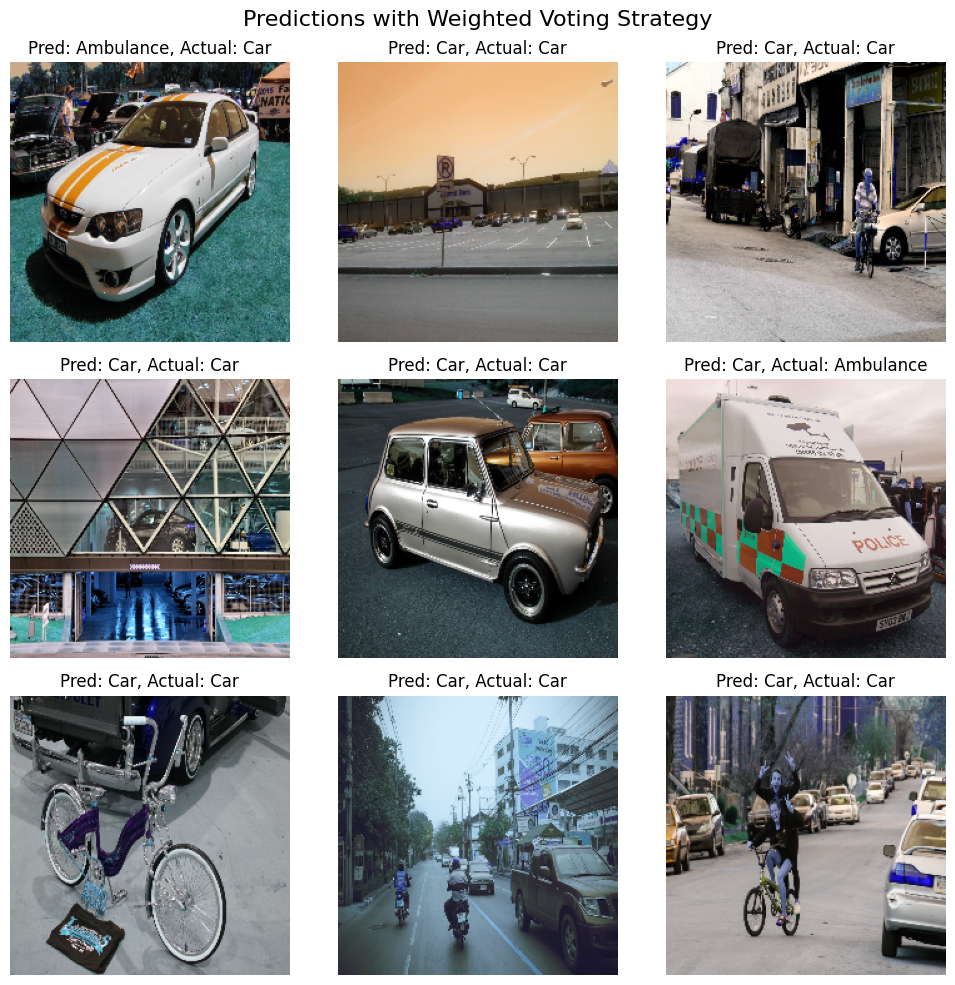

2024-10-20 12:01:19.914199: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [32]:
plot(val_ds, weighted_voting__preds,
     title="Predictions with Weighted Voting Strategy")